<a href="https://colab.research.google.com/github/musicjae/DeepLearning/blob/main/korean_flag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from PIL import Image
from keras.optimizers import Adam
from keras.applications import InceptionV3
from keras.applications import ResNet50
from keras.applications import vgg19
from keras.applications import xception
from keras.applications import NASNetLarge
from keras.models import load_model
from keras import layers
import keras


import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [3]:
img = image.load_img('/content/drive/MyDrive/datasets/flag/train/korean flag/000001 (2).jpg')

In [4]:
cv2.imread('/content/drive/MyDrive/datasets/flag/train/korean flag/000001 (2).jpg').shape

(833, 1200, 3)

In [5]:
train = ImageDataGenerator(rescale = 1/255)
val =ImageDataGenerator(rescale=1/255)

### 다른 나라 국기와 태극기 구별

In [6]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/datasets/flag/train/',
                                          target_size = (200,200),
                                          batch_size = 32,
                                          shuffle=True,
                                          class_mode='binary')

val_dataset = train.flow_from_directory('/content/drive/MyDrive/datasets/flag/val/',
                                          target_size = (200,200),
                                          batch_size = 32,
                                          shuffle=True,
                                          class_mode='binary')

Found 1013 images belonging to 2 classes.
Found 130 images belonging to 2 classes.


### 태극기 옳게 그려졌는지 여부

In [7]:
train_dataset2 = train.flow_from_directory('/content/drive/MyDrive/datasets/flag/wrong or right/train/',
                                          target_size = (200,200),
                                          batch_size = 32,
                                          shuffle=True,
                                          class_mode='binary')

val_dataset2 = train.flow_from_directory('/content/drive/MyDrive/datasets/flag/wrong or right/val/',
                                          target_size = (200,200),
                                          batch_size = 32,
                                          shuffle=True,
                                          class_mode='binary')

Found 17 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [8]:
train_dataset.image_shape

(200, 200, 3)

In [9]:
train_dataset.class_indices

{'korean flag': 0, 'no korean flag': 1}

In [10]:
train_dataset2.class_indices

{'korea flag': 0, 'non korea flag': 1}

## model1 CNN

In [58]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16,(3,3),activation='elu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.BatchNormalization(),

                                    tf.keras.layers.Conv2D(32,(3,3),activation='elu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.BatchNormalization(),

                                    tf.keras.layers.Conv2D(64,(3,3),activation='elu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.BatchNormalization(),
                                    
                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512, activation='elu'),

                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    
])

model.compile(loss= tf.keras.losses.BinaryCrossentropy() , optimizer= keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])

model_fit = model.fit(train_dataset,
                      steps_per_epoch = 25,
                      epochs= 100,
                      validation_data = val_dataset)

Epoch 1/100
18/25 [====================>.........] - ETA: 3s - loss: 9.5827 - accuracy: 0.7027

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


25/25 [==============================] - 14s 556ms/step - loss: 8.4709 - accuracy: 0.7072 - val_loss: 4.1724 - val_accuracy: 0.6692
Epoch 2/100
25/25 [==============================] - 13s 512ms/step - loss: 3.6243 - accuracy: 0.7681 - val_loss: 12.8633 - val_accuracy: 0.6846
Epoch 3/100
25/25 [==============================] - 12s 500ms/step - loss: 1.2318 - accuracy: 0.8619 - val_loss: 9.6942 - val_accuracy: 0.6462
Epoch 4/100
25/25 [==============================] - 13s 532ms/step - loss: 0.4511 - accuracy: 0.8838 - val_loss: 6.5756 - val_accuracy: 0.6923
Epoch 5/100
25/25 [==============================] - 13s 523ms/step - loss: 0.3049 - accuracy: 0.9265 - val_loss: 7.0698 - val_accuracy: 0.7077
Epoch 6/100
25/25 [==============================] - 12s 491ms/step - loss: 0.3628 - accuracy: 0.9337 - val_loss: 2.5972 - val_accuracy: 0.7077
Epoch 7/100
25/25 [==============================] - 13s 518ms/step - loss: 0.1197 - accuracy: 0.9712 - val_loss: 2.4985 - val_accuracy: 0.7000
Epo

In [ ]:
model.save('/content/drive/MyDrive/datasets/flag/Vanila_CNN.h5')

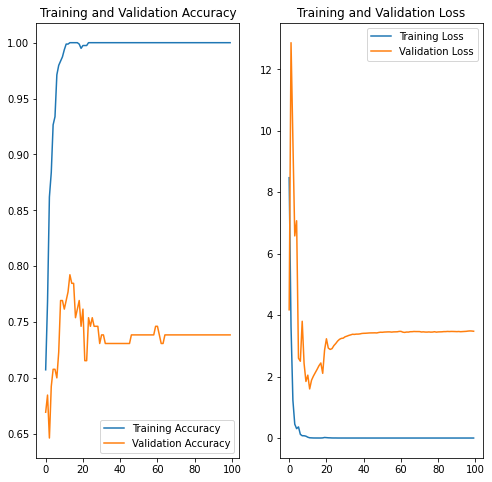

In [59]:
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']

loss=model_fit.history['loss']
val_loss=model_fit.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## model2 resnet50

In [12]:
res50 = ResNet50(include_top=True, weights='imagenet')


102973440/102967424 [==============================] - 1s 0us/step


In [64]:
x = res50.output # param num= 2048
flatten_layer = layers.Flatten() # instantiate the layer

x = flatten_layer(x)  
prediction = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model2 = tf.keras.Model(res50.input, prediction) # model = tf.keras.Model(inputs=inputs, outputs=outputs)
model2.compile(loss= tf.keras.losses.BinaryCrossentropy() , optimizer= keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])

model_fit = model2.fit(train_dataset,
                      steps_per_epoch = 25,
                      epochs= 100,
                      validation_data = val_dataset)

Epoch 1/100
24/25 [===========================>..] - ETA: 0s - loss: 0.6741 - accuracy: 0.7292

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


25/25 [==============================] - 17s 683ms/step - loss: 0.6732 - accuracy: 0.7376 - val_loss: 0.6911 - val_accuracy: 0.6385
Epoch 2/100
25/25 [==============================] - 14s 578ms/step - loss: 0.6562 - accuracy: 0.8150 - val_loss: 0.6911 - val_accuracy: 0.6385
Epoch 3/100
25/25 [==============================] - 14s 556ms/step - loss: 0.6521 - accuracy: 0.7769 - val_loss: 0.6878 - val_accuracy: 0.6769
Epoch 4/100
25/25 [==============================] - 15s 581ms/step - loss: 0.6357 - accuracy: 0.8213 - val_loss: 0.6866 - val_accuracy: 0.5538
Epoch 5/100
25/25 [==============================] - 14s 553ms/step - loss: 0.6404 - accuracy: 0.7617 - val_loss: 0.6635 - val_accuracy: 0.6385
Epoch 6/100
25/25 [==============================] - 15s 602ms/step - loss: 0.6235 - accuracy: 0.7972 - val_loss: 0.6804 - val_accuracy: 0.6385
Epoch 7/100
25/25 [==============================] - 14s 570ms/step - loss: 0.6149 - accuracy: 0.8137 - val_loss: 0.7071 - val_accuracy: 0.3615
Epoc

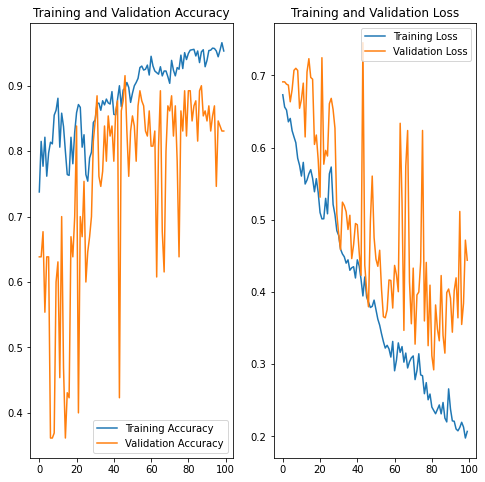

In [65]:
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']

loss=model_fit.history['loss']
val_loss=model_fit.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [67]:
model2.save('/content/drive/MyDrive/datasets/flag/resnet50.h5')

## model 3  Inceptionv3

In [14]:
Inceptionv3 = InceptionV3(include_top=True,weights='imagenet')

96116736/96112376 [==============================] - 1s 0us/step


In [15]:

x = Inceptionv3.output # param num= 2048
x = Inceptionv3.output # param num= 2048
x = layers.Flatten()(x)
x = layers.Dense(512,activation='elu')(x)

prediction = layers.Dense(1, activation='sigmoid')(x)

model3 =keras.Model(Inceptionv3.input, prediction) # model = tf.keras.Model(inputs=inputs, outputs=outputs)


In [16]:
model3.compile(loss= tf.keras.losses.BinaryCrossentropy() , optimizer= keras.optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

In [17]:
model_fit = model3.fit(train_dataset,
                      steps_per_epoch = 25,
                      epochs= 100,
                      validation_data = val_dataset)

Epoch 1/100
25/25 [==============================] - ETA: 0s - loss: 0.5547 - accuracy: 0.6946

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


25/25 [==============================] - 258s 10s/step - loss: 0.5547 - accuracy: 0.6946 - val_loss: 0.7928 - val_accuracy: 0.3615
Epoch 2/100
25/25 [==============================] - 50s 2s/step - loss: 0.4184 - accuracy: 0.8112 - val_loss: 0.9884 - val_accuracy: 0.3615
Epoch 3/100
25/25 [==============================] - 25s 981ms/step - loss: 0.3257 - accuracy: 0.8745 - val_loss: 1.2947 - val_accuracy: 0.3615
Epoch 4/100
25/25 [==============================] - 17s 671ms/step - loss: 0.3103 - accuracy: 0.8669 - val_loss: 1.2933 - val_accuracy: 0.6385
Epoch 5/100
25/25 [==============================] - 16s 635ms/step - loss: 0.2950 - accuracy: 0.8897 - val_loss: 1.2114 - val_accuracy: 0.6615
Epoch 6/100
25/25 [==============================] - 15s 584ms/step - loss: 0.2347 - accuracy: 0.9151 - val_loss: 1.0472 - val_accuracy: 0.6154
Epoch 7/100
25/25 [==============================] - 15s 594ms/step - loss: 0.2381 - accuracy: 0.9113 - val_loss: 0.7059 - val_accuracy: 0.6385
Epoch 8/

In [18]:
model3.save('/content/drive/MyDrive/datasets/flag/inceptionv3.h5')

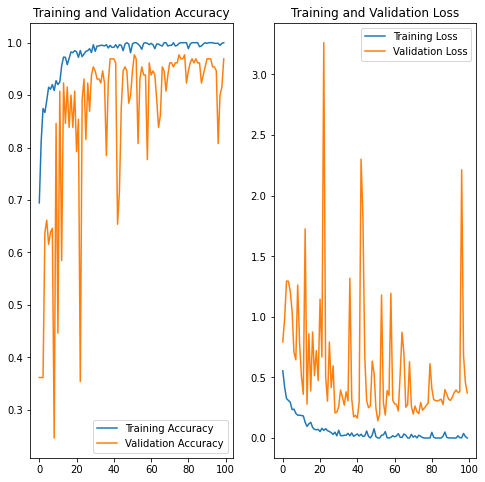

In [19]:
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']

loss=model_fit.history['loss']
val_loss=model_fit.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## vgg19

In [20]:
vgg = vgg19.VGG19(weights='imagenet',include_top=False, input_shape=(200,200,3))

80142336/80134624 [==============================] - 0s 0us/step


In [21]:
x = vgg.output

flatten_layer = layers.Flatten()  # instantiate the layer
x = flatten_layer(x)  

prediction = layers.Dense(2, activation='sigmoid')(x)

model4 =keras.Model(vgg.input, prediction) # model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [22]:
model4.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)      

In [23]:
model4.compile(loss= tf.keras.losses.BinaryCrossentropy() , optimizer= keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])

In [24]:
model_fit = model4.fit(train_dataset,
                      steps_per_epoch = 20,
                      epochs= 50,
                      validation_data = val_dataset)

Epoch 1/50
 4/20 [=====>........................] - ETA: 5s - loss: 62.1749 - accuracy: 0.5234

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


20/20 [==============================] - 15s 773ms/step - loss: 13.2006 - accuracy: 0.6105 - val_loss: 0.6811 - val_accuracy: 0.6385
Epoch 2/50
20/20 [==============================] - 12s 597ms/step - loss: 135.9075 - accuracy: 0.6248 - val_loss: 0.6707 - val_accuracy: 0.6385
Epoch 3/50
20/20 [==============================] - 13s 635ms/step - loss: 0.6406 - accuracy: 0.6630 - val_loss: 0.6656 - val_accuracy: 0.6385
Epoch 4/50
20/20 [==============================] - 13s 630ms/step - loss: 0.6601 - accuracy: 0.6469 - val_loss: 0.6597 - val_accuracy: 0.6385
Epoch 5/50
20/20 [==============================] - 13s 647ms/step - loss: 0.6428 - accuracy: 0.6741 - val_loss: 0.6557 - val_accuracy: 0.6385
Epoch 6/50
20/20 [==============================] - 12s 616ms/step - loss: 0.6399 - accuracy: 0.6687 - val_loss: 0.6544 - val_accuracy: 0.6385
Epoch 7/50
20/20 [==============================] - 13s 631ms/step - loss: 0.6358 - accuracy: 0.6709 - val_loss: 0.6544 - val_accuracy: 0.6385
Epoch 8

In [36]:
# 학습된 weights 저장
model.save('vgg19.h5')

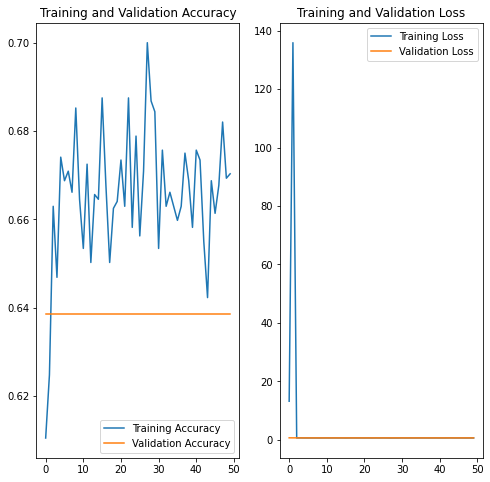

In [26]:
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']

loss=model_fit.history['loss']
val_loss=model_fit.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## xception

In [27]:
xception= xception.Xception(weights='imagenet',include_top=False, input_shape=(200,200,3))

83689472/83683744 [==============================] - 0s 0us/step


In [85]:
x = xception.output
flatten_layer = layers.Flatten() # instantiate the layer
x = flatten_layer(x)  
x = layers.Dense(128,activation='elu')(x)
prediction = layers.Dense(1, activation='sigmoid')(x)

model5 =keras.Model(xception.input, prediction) # model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [87]:
model5.compile(loss= tf.keras.losses.BinaryCrossentropy() , optimizer= keras.optimizers.Adam(lr=0.001) , metrics=['accuracy'])

In [49]:
from keras.callbacks import EarlyStopping

In [88]:
model_fit = model5.fit(train_dataset,
                      steps_per_epoch = 20,
                      epochs= 100,
                      validation_data = val_dataset,
                       )

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 0.1485 - accuracy: 0.9746

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


20/20 [==============================] - 15s 729ms/step - loss: 0.1485 - accuracy: 0.9746 - val_loss: 0.5656 - val_accuracy: 0.9000
Epoch 2/100
20/20 [==============================] - 15s 735ms/step - loss: 0.0280 - accuracy: 0.9921 - val_loss: 0.5506 - val_accuracy: 0.9000
Epoch 3/100
20/20 [==============================] - 14s 707ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.5584 - val_accuracy: 0.9077
Epoch 4/100
20/20 [==============================] - 13s 661ms/step - loss: 0.0098 - accuracy: 0.9968 - val_loss: 0.6510 - val_accuracy: 0.8692
Epoch 5/100
20/20 [==============================] - 14s 693ms/step - loss: 0.0079 - accuracy: 0.9968 - val_loss: 0.5729 - val_accuracy: 0.9000
Epoch 6/100
20/20 [==============================] - 13s 638ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.5947 - val_accuracy: 0.9000
Epoch 7/100
20/20 [==============================] - 14s 695ms/step - loss: 0.0058 - accuracy: 0.9969 - val_loss: 0.6142 - val_accuracy: 0.9000
Epoc

In [97]:
model5.save('/content/drive/MyDrive/datasets/flag/xception_final.h5')

In [90]:
model5.summary()

Model: "functional_40"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 99, 99, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 99, 99, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 99, 99, 32)   0           block1_conv1_bn[0][0]            
______________________________________________________________________________________

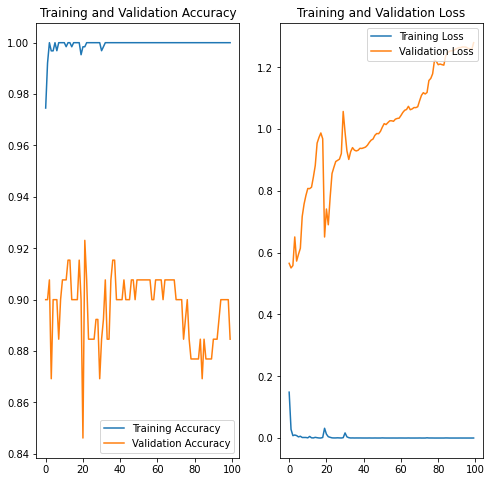

In [91]:
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']

loss=model_fit.history['loss']
val_loss=model_fit.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## EfficientNetB7

In [81]:
from tensorflow.keras.applications import EfficientNetB3
efficientnet= EfficientNetB3(weights='imagenet',include_top=False, drop_connect_rate=0.4,input_shape=(200,200,3))

43941888/43941136 [==============================] - 0s 0us/step


In [92]:
x = efficientnet.output

flatten_layer = layers.Flatten() # instantiate the layer
x = flatten_layer(x)  

prediction = layers.Dense(1, activation='sigmoid')(x)

model6 =keras.Model(efficientnet.input, prediction) # model = tf.keras.Model(inputs=inputs, outputs=outputs)
model6.compile(loss= tf.keras.losses.BinaryCrossentropy() , optimizer= keras.optimizers.Adam(lr=0.001) , metrics=['accuracy'])


In [93]:
model_fit = model6.fit(train_dataset,
                      steps_per_epoch = 20,
                      epochs= 100,
                      validation_data = val_dataset,
                       )

Epoch 1/100
13/20 [==================>...........] - ETA: 4s - loss: 0.2389 - accuracy: 0.8846

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


20/20 [==============================] - 16s 806ms/step - loss: 0.1863 - accuracy: 0.9157 - val_loss: 11.4958 - val_accuracy: 0.3615
Epoch 2/100
20/20 [==============================] - 14s 705ms/step - loss: 0.1584 - accuracy: 0.9539 - val_loss: 9.7985 - val_accuracy: 0.3615
Epoch 3/100
20/20 [==============================] - 13s 667ms/step - loss: 0.0478 - accuracy: 0.9857 - val_loss: 4.6671 - val_accuracy: 0.4462
Epoch 4/100
20/20 [==============================] - 14s 691ms/step - loss: 0.0491 - accuracy: 0.9875 - val_loss: 0.8772 - val_accuracy: 0.7846
Epoch 5/100
20/20 [==============================] - 14s 703ms/step - loss: 0.0176 - accuracy: 0.9937 - val_loss: 0.7870 - val_accuracy: 0.8462
Epoch 6/100
20/20 [==============================] - 14s 685ms/step - loss: 0.0068 - accuracy: 0.9984 - val_loss: 0.6846 - val_accuracy: 0.8692
Epoch 7/100
20/20 [==============================] - 14s 713ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.8725 - val_accuracy: 0.8692
Epo

In [94]:
model6.save('/content/drive/MyDrive/datasets/flag/efficientnet.h5')

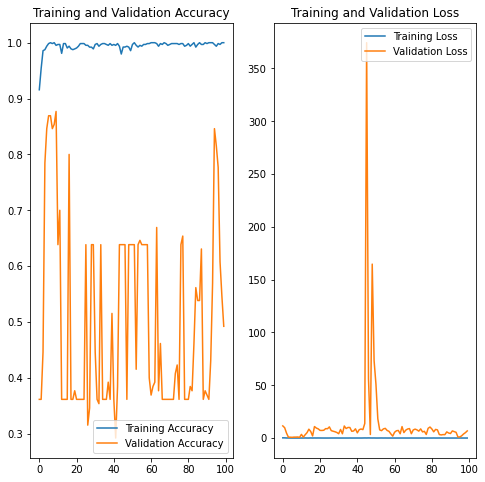

In [95]:
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']

loss=model_fit.history['loss']
val_loss=model_fit.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [96]:
model6.summary()

Model: "functional_42"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
rescaling_4 (Rescaling)         (None, 200, 200, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
normalization_4 (Normalization) (None, 200, 200, 3)  7           rescaling_4[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 201, 201, 3)  0           normalization_4[0][0]            
______________________________________________________________________________________

In [34]:
use_model = load_model('/content/drive/MyDrive/datasets/flag/korea_flag.h5_3')

In [35]:
file_path = tf.keras.utils.get_file('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxIQEhUPEBIWERUWGBkXFRUXFhgWFRcYFhgXFxcWFRUYHSggGBolGxgWIjEhJSkrLi4uFx8zODMtNygvLisBCgoKDg0OGhAPFzcdHR0tLS0tLS0tKy03LS0rLS0tLS0tMS03LTcrNy4tLS0tKy0rNy0tLS0tLS0tLTc3LS8tNf/AABEIAOMA3gMBIgACEQEDEQH/xAAcAAEAAQUBAQAAAAAAAAAAAAAABAECAwUGBwj/xAA8EAACAAQEBAMFBgUEAwEAAAABAgADBBEFEiExE0FRYQYHIjJCcYGRFCNSobHRFSRiwfAzcoKyQ5KiU//EABsBAQACAwEBAAAAAAAAAAAAAAADBAECBQYH/8QAJhEBAAIBAwMEAgMAAAAAAAAAAAECAwQREgUxUSFBkdEUoRNhgf/aAAwDAQACEQMRAD8A9cmu4b0rddOnU35/CIsybUckHPkDsBa/q6367RKnVAQ2LG5+H7RhTEEOxb6DoD+hjPGTdGnzaziuElpwgvoa4BLene9/6uQ23i+pm1WayIoWw9WhJNl5ZtLEn5CJjzwFD3Njbpz2iOMVlkXzG1yNuhAPLvGBY8yqvYItsm+YC7+jTnYavy5CMVXNq7/dqtsovdQbtYX9/qdv6d9YnVVWssBmY2JsLAHlfp/lxF0moDmwJva+unMjp1EBBedV5JlpaZgo4dzcMfeza6fD4RgSdXW1RQdPdFvev7+2i/WNitchuATpvoOoF9upEBXJYHMdTbb4Hp3EBiM2pvM+7UgX4etr+qwub/h15RGNRWWNpQzWHtFbX9VyLH/boesT51Yq3ux05AX6jTTXYxIQ3AIOhFxtz+UBrjNqshORc1tBYe1w729rbPpe+3KLpE6pL2eWqpc876ZtNQd8tuW942GU9f0/aGU9f0/aA1gmVd/ZUDMemq6ke9vYAfE9BFvGrLS/u0JzfeWtot1uV9XTN1ja5T1/T9oZT1/T9oDXUc6pLgTZaqvvEEGxy629WozbabRPmZraWvF2U9f0/aGU9f0/aAwgzL7C1/y7QvMvsNvzjNlPX9P2gQev6ftAYZhfkBANM00Gxv8AHlFyzlOzg/MftATl0GffbUftAXy83OLoxCav4x9R+0DNX8Y+o/aAy2isYeMu2cfUftDjL+MfUftAZYWjCJ67Z/0/aHHX8X+fSAzQiHU4jKl2zOdQTopbRbFicqm1sw+sZaKpWavEltmU3FyCNtDoQDAZrdopkG9h9IzS0v2i/gd4CMUB0IB+QgUHQfQRJ4HeHA7wEcqDoQDFFQDYAfACJPA7w4HeAjBB0H0iuUdB9IkcDvDgd4COVHQRW0Z+B3hwO8BghGfgd4cDvAYIRn4HeHA7wGCEZ+B3hwO8BggYz8DvDgd4CJwF/CIcBPwr9BEvgd4cDvAQxTp+BfoIqadPwj6RL4HeHA7wEP7Mn4F07CK8Bfwj6RL4HeHA7wETgL+EfSBkqd1H0iXwO8UaTYXgNfPw+U9syDQEaEjRrXGh12H0jJS0qSlyIthcm1ydTqd4z3h8oDNTjeM8YKbnGeAQhCAQhGg8Z+LKfC6c1FQbnaXLB9cxvwr/AHPKA31+UVj5SHjjE6zE5dZIZjPLZJMlLlAhP+lk5qeZPS9xYEfT+H12fLKmmWlQJaPNkq4cpm07ErmDAG2toCdCEIBCEIBCEIBCEIBCEIBFrOAQCQCdAL7m19OugMR8RxCVTpxZ8xZSXC5nIUXY2AuepMfOXnBjGJy8SDzy0gSjmozLY5MoPtq3vOfev8NrQH0vCPO/KzzKl4ogp6giXVqNRss0Dd5ffqvzGm3okAhCEAi2ZsYui2ZsYCJaFoQgM1PzjPGCm5xngEIQgOe8beLqfCpBnzzdjcS5QPrmN0HQdTyj5fxzGKzG6wMwM2bMOWVKS+VRyRByA3JPcmOm81PDuKTMTCTg1S09stKUFkKckUbJlG9z1JPOOhd6bwnT5VyVOKzk1O6SFP6L+bkX0AAAP5bwnT+5U4rOT4pIU/mF+hcjkBpxPgWZidZia1FJMZqktnmzWuUCm2bjcsltMvwA5Rr8AwSsxusKqTNmOc86c+qoCdXc/kAOwEdr4s8T0+EU7YNgzXc6VdYPbZtmRGHPcXGi7DW5Ae64R4ipqqZNp5M9Js2QQs5V5G2tuovppexFjrG2j5l8lfClZU1aVsl2ppMlvXOHv9ZSg6Ncb30A72j6agEIQgEIQgEIQgERsRr5VPLafPdZctBdnY2AESY8i8/sEr58lJ0hjMpZWs2So9QbX75vxqBpb3d9bkgNB5/0NbNMqtEwT6Cw4fD9mWzAep7E5s3J9uWnOD5cYwuLyv4BiMt565S1PPUXmU+Uc25KNgT1ym4ItqPLbzENCDQ1o+0UMz0sjDNwg3tFR7yG+q/Ma6H12ip8M8PYfOxCkBnS5nrVwc5fOfupQe2ksE2ue97mA8G8V+GKvBaoK5KkHNInpcBwp0ZD7rDS67juLE+4eVHmemIqKSrISrA0OyzwBuvR7br8xzA4nw35gSsWEzDMdClJzlpE4ALwXY+lb+6BewY/BrgxzeLeWeIUtfLo5CtMLtmkVC3Vcqm+dmH+mV0J6aWvcXD6nhEPCJE2XJly583jzFRQ83KFzsBq2UbXiZAItmbGLotm7GAiQhCAzU3OM8R6bnEiAQhCAsmJcdDrY6XFxa4vzj5tx7yrxKZiZkFmnrOJmfa29nJcZmmHk4uBl56W0j6ViPiFGs+U8l8wWYpRirFWswsbMNQe8B89+L/FVPhVOcFwZtdqqrHtu2zKjDnyJGg2HMxpvK/y5m4tM4s28ukQ+t9jMI/8cvv1PL4x0+G+Rs37e0ufMvRJZhMBs8xSTaXb3W01O3TfT3agopciWsmSgly0AVUUWAA5CAph1BKppaSJCCXLQWVVFgAP83iTCEBS8aXHvFNLRaTpl35S1GZz8uQ7m0aLzB8YGlH2anP3zC7Nvw1O3/M8um/SPJpjliWYliTckm5J6kncxUzanhPGvd2+n9InPX+TLO1faPefp6LV+abX+5phbq76/RR/eMMnzTm39dMhH9LsD+YMefQir+Rk8u5HSdJEbcP3P29nwTx9SVJCMTIc7CZYKT2cafW0dWDHzaRHceA/GbSGWmqWLSW0RybmUTsCeafp8IsYtVvO13K13ReFZvg9dvb6+nrcUIgDFYuvOvCvNvyoy58Qw1NNWnU6jbq8oDl1X6dI4ry78fNh+akql+0UM24myWGbLm0ZkB/Ndj8Y+qo8X81/KUzmNdhiDiE3m04sA5O8yXyDdV2O413DjfE/lhMabKnYR/N0lUfuWBvwibkrNbkosfUehB13+gfB+DzKKkk006c1Q8tbF2/6rzyjYX1sI03ld4MOE0nCmTDMmzCHmDMTLRrWyy1205tufgAB2UAhCEAi2ZsYui2bsYCJCKQgM1NziREem5xIgEIQgEIQgEIQgEQcbxFaWnm1L+zKRnPfKCQPmdPnE6OK845pXCp9veMpT8DNS8bUrytEeR5NU1LzXabMOZ3JZj3P9oxRHoKgTEB57H4iJEcTLW1LzW3eJfRMNq2x1mnaY9CEI0uI4mSSks2A3PM/DtE2m0t9RfjT5RavV49NTlf/ACPLdQMckWO9zfrfWJ1DiTIQHOZe+4joZejZK13pblPjbZzMPXcd78b14x533+ez6I8uMWNTSKHN3lHhseZAF0J75SPpHVR5h5OTvXUryKy2/NxHp8a4LTOON3B6lijHqb1r27/PqQhCJVEhCEAhCEAi2bsYui2bsYCHCH1hAZqbnEiMFNzjPAIQhAIQhAIQhAI5bzNw81GGVKKLsE4gHUymEy30Ux1MWuoIIIuDoRG1bcZifA+RaapaWcyH49D8Y2SY11TXsYm+P/DDYbVvKt905LyG5FCfZv1XY/I845uOpk0uDUbXtXf+13T67PgjbHbaPHdOq8UdxlAyDtufnEGEImxYceKvGkbQhzZ8ma3LJbeSEIzUVJMnzEkSVLzJjBUUcyf0HMnkATEqF7Z5FUp+zTZ595hLXuJea/8A2A+UenxqfCmCrQ0kmkXXhqAxHvOdXb5sSY20efttynj23n9y3y5JyW5T4iPiNiEIRhGQhCAQhCARbN2MXRbM2MBD0hcRWEBmp+cZ4wU3OM8AhCEAjBXVSyZbznDFUUsQqlmsoucqjUnsIzM1v7d/hHzl4r818Ql4mZiK1PLkMUFK+mZbjMZwG7GwII9nS3MkJdF54zxXtNmy70bWUSRbPLUHSYG5vrcjY7aWvHu+EYpJq5SVFPME2W4urD8wRuCNiDqI8NxnwbTeIJf8SwYpJnMwFTTOQoVm3fQek7nTRgCRrcHvMJo6Pwth7POms5Y3c39U6bawWVLJsNB9BcnSA9ChGs8OY9IxCQtTTOHRv/ZTzRxyYdI2cBp/FPhuRiMg09Qum6OPbltyZD17bEaGPn7xb4CrMOYl0M6TynywStv611Ms/HTuY+mYoRE+HUWxdvWB8fA321isfUmIeDsPqCWnUclmO7ZArH4stiYj0/gHC5ZutFJJ/qXP+T3i5+dTwzu+dcCwGprn4dLJaab2LDRF/wB7n0r+vaPePL3y+l4YONMInVLCxe3pQHdJYP5tuew0js5EhUUIihFGyqAAPgBGSK2bVWyRtHpDBCEIqhHmnmz5lLhqGkpSGq3G+4kqR7bci/RfmdLA9lU+JKQVQw41CrUOpYJf1W6A7Z7ahd7C9o8R8QeTNc1eFlzeNInMXepmG7yxe7cUe8/S2jHprYO48mPH07EpbU1SjNNkqCZ4HodToBMOyzP1sTyMenx82eOfF0ijp/4Hg5yyVuKmoB9U9jowDDcHYnnsPSNe/wDJjxPVPQTJmIWWmkaS6qY2Usq6Mpv7QXQZ/lqRAeqQiyVNV1DqQykAgg3BB1BBG4i+ARbM2MXRbN2MBEhCEBmp+cZ4j03OJEAhCEB83ec2PYnLxFeLmpkktnpMjHKQNOLm95zsQdr27nZyDT+K5BRgtPishLhwLS56Lp6rbC5HdSdLi4j2Txb4Yp8Tp2pqlbjdHHty25Oh5H8jsY0GC4LQ+GqJ5jvyBnTiBxJra5UUdNSFUfuYD52wvEq3BKwsoaROlnLMltsw5q42ZT1HYg849T8R0UrxXSrW0MwpWU65XpHe666kLfQEkaONGtY2I0jTMVofFeanmKtFXJm+yuTcTU1IlueZ6r815iOAwShxPDsTSnp0eXWK2UJurg6nNyaUQLk7WF9LQEvy1rcSo8RWno5bGYzZZ1O91QqvtcX8GXU5tx3vY/VYiBQYcit9peVLSpdFWc6DfLrlDEXKgk2v0EbCAQhCAQhCAQhCARynmZ4gqMPoZlRSyTNcaZt1lAg3msu5A/vrpHVxa6gggi4OhB1BB3BEB8i+FMArMZrLS2YuW4k6oYn7vW+dm/FfYDUkcrXHvFD5g4aZ/wDBZs9p1kEk1EwjhznsVdGcW1P4tiSR0vF8xfD8+hw2ZKwSSslGZnqRLvxijanhnoNQRyUWGkeT+W3gH7fmraxuBQybmZMJy8TLqUU8gObcthrsHd1/knTSqs1Lz8mHorTZqMTxFC68PP8Agtc5vaAFtzmjg/Mnx8cQK0lIvAoZNllSgMufLorso2Ftl5fGPQ8L866X7YaZpPDobCXKm2OZbaZpif8A5kW03AGt72HT03lZhv21cSlpdbZ1kCxkZzqJgHS2uXa9jARPI7C6+nov5xyJTWNPJYfeS1OpJPuhtwvLfS9o9IhCARbM2MXRbN2MBEhFIrAZabcxIiPTHeJEAhCEAjVeJfD9PiEhqWqTOjag7MrDZ0PJh/mkbWEB8reIPLavoq6XSyVabxG/lpyXUGxvcsP9Nl3PS14+lMDwtpcuS1UyT6pJfDeoyBWYGxYA72uB8bXjaWisAhCEAhCEAhCEAhCEAhCEAjz/AM2vB9RX0Ik0L8PhEuaZbLLnc7abMDcgbEnXWxHoEIDwnyg8rCSuIYjLIAN5NO4sSR/5JqnYX2U77nTf3aEIBCEIBFs3YxdFs3YwES8LxS8LwF6TCIu457RAxKcyrZFZi2mZDLBS+zfekA/n8I1eFVs4SpxcglHYI811s1jsxlLrYdBqTblAdHxz2hxz2jlmxqYrTWIZf5UTlllWIWYvGzXJUFQQi+1a/S5jLX4jMlEIHLWlIc9ltfXOxGU8he2mxgOk457Q457RzjYlNWUZhIOrDkG2UrbSw0zHXX6Re2ITGpzUK4tml5fT7S51Dg33vcjYWIgOg457Q457RzWOYnNRZ4Sw4aZ0mJmaxVluky65bm50BOgO2kbLEa9kk8aTLM0+myEOrWYgXy5S2l7kWvYGA2fHPaHHPaOXwHFZzzagTwwCIjBAt7XaaDlCjMdFA21K3trF9DiLmqyszlJgZkUy3Wy3UAlWljIFvYm5vmBsIDpeOe0OOe0aXF6ydKdOGE4Z9pnYKL31BcsMgC3IIVr2tYRhpKqcaWWbNOmOD65bSzbU5WzNYEWtrY3gOg457Q457RylDXTuCQzsW48uXxmCC4Z1VwqqzDTUA7ajvGSuxaYJzylfKBt6b2HpGYm3W/17QHT8c9occ9o0OJV0xQmVsuYLf023dFPtbXzdNIvFW/8ALNm0mOyMttwZcxweZzAyxr3MBu+Oe0OOe0ckmLVBc5layVAUqi3LIVmgrqBfVVIOhsQdjrtPEGJTKeWHlS+KWLLbU5TkZlJUDUXW3L2hAbnjntDjntGjpKqc0qba7zBMdJYNhbbLmNvZUnfew5mMGFYnMabMz3ZRLl5shR0lzQZgmIMpLXNkIXW19bXgOj457Q457RzNPis0z5KzVaVnE5Wl5SRdWlGU1wDb0PqQcoJIvpECT4imzp8hQcqs5DBbFQAStma5vf6gqNBzDteOe0OOe0aP7cwlzphcAiZMVAQPSJYygDUXJKlue8ZKWsch7svpJ1YAWAaxJIbkvIgfGA3HHPaKNOJ6Ro8IrXmPZpgOlyCuU9wNdwct+XqjcwC/eF+8UisBZOkq4Kuqsp3VgCD8QYspqVJYIRQoZixA0FzYH4bCI2MTXVAUOU3+VufI6xrKGqmvTsS5LAyxfS2UiXfWw19RJPwgN69MpLEgEsuRu666f/R+sYUwyULWB0VUHqb2U9kHXX4mNZh7uxYTWIDKb6sLDhqDY7AA5h1uIwyaqqKUpCvNR5KtMypLJLem4Z5jgKGBPK/SA3K4ZKClAthcnQkEE2uQb3Gwg2GyiMuQAZkawuAWl2yE23tlX6CIfhOa7UkriKykKBdyCWsB6gQTpy1sdNo28BZOlB1KMLg6EdRF8IQGNZChi4AzEAE9lLEfmzfWBkKXEy3qClQexIJH1UfSMkIDBW0azlyPe11YWJBBRgykEbagQlUSLL4AHoy5bEkmxFjc7n4xnhAQJGDyklcAAlSwbUm+YEMDcbWKrt0jK+HyiSxUEtfNvqGtcHqNNolQgIs7Dpb2DAta1rs3um41vrqIqlBLBRgNUzFdSQC+jEAnpf4XPWJMICMaFeJxhdWtY2Ng1gQuce9bMbfGJMIQFsuWFvYWuST8TuYjUGGy5F+GDrYakmyrfKq32UXOneJcICxpILB7agEA9A1if+o+kUmyFbKWAOU3HYi/7xkhAYEokBcge22dhc2LWC3te2yjTbSLjTqVZCNGzXGuua+b9TGWEBiWmUNnA115n3iCdNvdH0jLaEIBCEIDHPK5SHtlPpOYixvpbXrFTKWwGUWGwttpbT5RFxWleahlrw7No+cMdP6crAggxqKOiqDIqJecMxdll5jMvmU2zF3dyAbDQCwsesBvFkyjmQKm1nUBb2IIsw7gnfkYyh1BCXANtFuL2Gmg6DSOY8OI/FazSyFkrKdeIxnAq87R/SpU3O+XbaJFDhc2VOk524tjObOWdiA6rZSXJNgfSNdQATrAb/MqZV0W+ii4Fza9gOZsNu0VLDqNN9dvjHJNhdQJpdguU1EltCWv685ZSQDpmtrewFhoI2QUWqlKsWM9SQNyAkppdr7iygfIwG7Dg7EH5xVWB21jnaKQVlzBlOZ5bgagDRmB1sB7TE9hbTrkpaZuIjEEWsx0AspM+zHbKbW26wG/vFL8o1YmoXD8UyxpfM1me18q5TqFuxPU3iPUyTxTMvrmBViFvYWQ2JtoPWQNd721gN5m5RTiC+W4uBci+oB2JHTQxo56NMmTvs5ZXNMgD3ynOTMMq5tvvfT3ow4dTVCVSF0W3BcMxnPNYXmK3tMgub7LoALwHSQhCAQhCAQhCAQhC0AhCEAhC0IBCELQCEIQGOdUImrsqf7iB+sYKfE5Lo0xXXIpysxOVQSFI1OliGUg9xEfHcJl1SWdcxUPk1sMzIV1021jTYLhExqaautPMchV1mqqhFlqpy3Fz6bXG/UwHRUtfKmMUlsGIVXuNQVa4DBhowurDTpGWoqVlqzMfZUsQNWyjchRqY1GCYVMkTWLMrLwpaIVVlAyvNYg53ck+q9yecVxTAEms87M4YqdFIX1cMyx6wM9rH2c2XnaA24qEIVriz2ya+1cZhl6m1zFtLVpNQTUN1N9TcWykqwIO1iCPlGumYOJkuQrswMrhkAEgXVcrbW1IuL8r3EZsEouFIElts03c3OVpjsLk6n0sN4DL/FJOdZYmKzMSAFObUBjYkbH0tv0hUYtIS4aYtwQGAIZlzMFBZV1AzEC52vHNS/DwlVUuXLlkSfSxcFw10SYts6WCm7DmL358pWI4BOZ5sxZikTHSylXZggmS2ZQxmZV1UnRe0B0zMBvprbU8+giLTYnKmFwjg8P2zqAPaGpPQqwPQqYridCtQhlPsedgSO65gcrd+UanB8AErjyphzy5igX9knNMnuRpsQJg2gNvKr5bsqIwYupdSNVZVIViGGhsWX6xjXF5BZUWarFmyDKQ3qylsptsbA79I1OCURSpZjIyZVmrxSWLPmmqwJY6NmC3/p2jBJwgy6uX6WmKHMwTDyukwWZrG9rqNWubjSwgOmlVCvmCm+VsrdmABI77iLRVplZswst8x6ZdyY070DtJmyipB401lb0+oOWmKRe/NgvyMDRuJcyWEOY2KH02yhwwUnQZrlr8tt4DbSK6W5yo4Y2vYb2Fv3H1jJLnqzFQbldx0+f+WjTYRQvLYZwbWYE2Q2N2A1texXmN7jpEhKEh10JVZnpuRYJwwbgdS5tp0gJwrZeRpub0pmzHXThkh7jtYwo6xJqlkvobEEFSDYGxU6jQg/ONbLoXdJxOaWzTZjIobLcWCLmtuGy5v8AlGLwjRGXKZmUyyzewS4CgdEfQG5bUDXTe14Da1mIS5OXiNlzEBRuTchdhyuy68rxWprpcu+ZhdVLFQbvlUXJCDU6dBGkxfw+0yzLNYhZomrL5AsylvVuR7RttrtGTHcDae7TAylTLKhGXPZrHVVJy6+ncG2XTeA3DVssBSXUZ7ZLsAWzbZQd73EVpKpJqCZLN1N+RBuCQQQdQQQR8o1FTgzzBTfeKnBVcysrOCy5CpsrqNGU73HaJPh2kmSZWSawY55hFly2DOza6m9735WvaA2kIpeK3gEIXheAQheKXgEIQgEIQgEIQgEIrCApCKwgKQisICkIrCApCKwgKQisICkIQgEIQgELwhAIQhALwvCEB//Z') # 2번째 항에 웹에서 이미지 주소 붙이기
image = Image.open(file_path).convert('RGB')
image = image.resize((200,200))
image = np.array(image) 

image = image.reshape((200,200,3))
plt.imshow(image)
x_test = [image]
x_test = np.array(x_test)
x_test = x_test / 255

pred = use_model.predict(x_test)
print(pred)
if pred < 0.5:
    print('태극기입니다')

else:
    print('태극기가 아닙니다')

TypeError: ignored

In [ ]:
file_path = tf.keras.utils.get_file('test10','https://file2.nocutnews.co.kr/newsroom/image/2017/01/10/20170110164158662967_preview.jpg') # 2번째 항에 웹에서 이미지 주소 붙이기
image = Image.open(file_path).convert('RGB')
image = image.resize((200,200))
image = np.array(image) 

image = image.reshape((200,200,3))
plt.imshow(image)
x_test = [image]
x_test = np.array(x_test)
x_test = x_test / 255

pred = use_model.predict(x_test)
print(pred)
if pred < 0.5:
    print('태극기입니다')

else:
    print('태극기가 아닙니다')